In [18]:
from project_functions_final_df import *
import pandas as pd
import geopandas as gpd
import numpy as np
import os 
from pathlib import Path  
import matplotlib.pyplot as plt

# Variable Assignments

In [19]:
clienttoken = "MLY|6271859919532158|486bcdece7a665eb89a5803f2994b4c9"
bounds = [(12.436781, 55.545432), (12.436781, 55.731815), (12.696966, 55.731815), (12.696966, 55.545432)]
my_shapefile_path = "koebenhavn.shp"
my_shp = gpd.read_file(my_shapefile_path)

In [20]:
ids_file = pd.read_csv('ids.csv')
IDs =  ids_file['image_id'].to_list()
np.random.seed(42)
IDs = list(np.random.choice(IDs, 20000))

In [21]:
strava_csv = pd.read_csv("7f42d69dd7bd00b04081b9cbd0d05ab4e5f87353dcd7364c34b8e7c74d42109d-1676891223740.csv")
df_activity = StravaToDF(my_shp, bounds, strava_csv)

# Create dataset

### Get Detections for Mapillary

In [22]:
df_detections = pd.read_csv('modeldata_for_parameters.csv')
#print(df_detections)
unique_occurences={}
for cat in df_detections[1:-2]:
    #print(df_detections[cat])
    unique_occurences[cat]= df_detections[cat].sum()
#print(unique_occurences)
unique_occurences.pop('Unnamed: 0')
unique_occurences.pop('edge_id')
unique_occurences.pop('Activity')
unique_occurences.pop('void--ego-vehicle')
unique_occurences.pop('void--car-mount')
unique_occurences.pop('void--ground')
#print(unique_occurences)

11216.011289272443

### Export Detections Dataframe

In [23]:
current_path = os.getcwd()
filepath = Path(current_path+'/detections.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
#df_detections.to_csv(filepath) 


In [24]:
print(unique_occurences)



def GetClasses(unique_occurences):
    labels=[]
    classes={}
    keyList = list(unique_occurences.keys())
    # initialize dictionary
    old_to_new = {}
    # iterating through the elements of list
    for i in keyList:
        old_to_new[i] = None
      
    for i in range(len(list(unique_occurences))):
        labels.append(list(unique_occurences)[i])
    for j in range(len(labels)):
        s=labels[j]
        splits=s.split('--')
        cat=splits[0]
        if cat!='void':
            if cat!='object'and cat!= 'nature' and cat!='construction' and cat!='general':
                if cat not in classes:
                    classes[cat]=list(unique_occurences.values())[j]
                    old_to_new[labels[j]]=cat
                else:
                    classes[cat]+=list(unique_occurences.values())[j]
                    old_to_new[labels[j]]=cat
            elif cat=='object' or cat=='nature':
                if 'support' not in splits and 'vehicle' not in splits :
                    if splits[1] not in classes:
                        classes[splits[1]]=list(unique_occurences.values())[j]
                        old_to_new[labels[j]]=splits[1]
                    else:
                        classes[splits[1]]+=list(unique_occurences.values())[j] 
                        old_to_new[labels[j]]=splits[1]
                elif 'vehicle' in splits:
                    if splits[-1] not in classes:
                        classes[splits[-1]]=list(unique_occurences.values())[j]
                        old_to_new[labels[j]]=splits[-1]
                    else:
                        classes[splits[-1]]+=list(unique_occurences.values())[j] 
                        old_to_new[labels[j]]=splits[-1]
                elif 'support' in splits: 
                    if splits[-1] not in classes:
                        classes[splits[-1]]=list(unique_occurences.values())[j]
                        old_to_new[labels[j]]=splits[-1]
                    else:
                        classes[splits[-1]]+=list(unique_occurences.values())[j] 
                        old_to_new[labels[j]]=splits[-1]
                    
                else: 
                    if 'utility' in splits: 
                        if 'utility pole' not in classes:
                            classes['utility pole']=list(unique_occurences.values())[j]
                            old_to_new[labels[j]]='utility pole'
                        else:
                            classes['utility pole']+=list(unique_occurences.values())[j] 
                            old_to_new[labels[j]]='utility pole'
                    elif 'traffic-sign' in splits: 
                        if 'traffic-sign' not in classes:
                            classes['traffic-sign']=list(unique_occurences.values())[j]
                            old_to_new[labels[j]]='traffic-sign'
                        else:
                            classes['traffic-sign']+=list(unique_occurences.values())[j] 
                            old_to_new[labels[j]]='traffic-sign'
                    elif 'traffic-light' in splits: 
                        if 'traffic-light'not in classes:
                            classes['traffic-light']=list(unique_occurences.values())[j]
                            old_to_new[labels[j]]='traffic-light'
                        else:
                            classes['traffic-light']+=list(unique_occurences.values())[j] 
                            old_to_new[labels[j]]='traffic-light'
                        
                    elif 'pole' in splits:
                        print(splits)
                        if 'pole'not in classes:
                            classes['pole']=list(unique_occurences.values())[j]
                            old_to_new[labels[j]]='pole'
                        else:
                            classes['pole']+=list(unique_occurences.values())[j] 
                            old_to_new[labels[j]]='pole'
                    elif 'sign' in splits: 
                        if 'sign'not in classes:
                            classes['sign']=list(unique_occurences.values())[j]
                            old_to_new[labels[j]]='sign'
                        else:
                            classes['sign']+=list(unique_occurences.values())[j] 
                            old_to_new[labels[j]]='sign'

            elif cat=='construction':

                if 'flat' not in splits:
                    
                    if splits[-1] not in classes:
                        classes[splits[-1]]=list(unique_occurences.values())[j]
                        old_to_new[labels[j]]=splits[-1]
                    else:
                        classes[splits[-1]]+=list(unique_occurences.values())[j]
                        old_to_new[labels[j]]=splits[-1]
                else: 
                    
                    if splits[-1] not in classes:
                        classes[splits[-1]]=list(unique_occurences.values())[j]
                        old_to_new[labels[j]]=splits[-1]
                    else:
                        classes[splits[-1]]+=list(unique_occurences.values())[j]
                        old_to_new[labels[j]]=splits[-1]

            elif cat=='general':
                if splits[1] not in classes:
                    classes[splits[1]]=list(unique_occurences.values())[j]
                    old_to_new[labels[j]]=splits[1]
                else:
                    classes[splits[1]]+=list(unique_occurences.values())[j] 
                    old_to_new[labels[j]]=splits[1]

    return classes, old_to_new

{'complementary--chevron-right--g5': 1.3333333333333333, 'information--dead-end--g3': 1.0, 'information--end-of-advisory-maximum-speed-limit--g1': 0.0, 'information--built-up-area--g1': 0.1254901960784313, 'regulatory--trams-and-buses-only--g1': 1.0, 'regulatory--turn-left-or-right--g2': 1.0, 'complementary--obstacle-delineator--g1': 0.2, 'warning--texts--g1': 2.5, 'regulatory--end-of-maximum-speed-limit-70--g1': 0.8833333333333333, 'complementary--except-trucks--g1': 0.25, 'regulatory--maximum-speed-limit-5--g3': 1.0, 'regulatory--no-bicycles--g1': 1.1666666666666665, 'object--traffic-light--cyclists-side': 0.125, 'regulatory--no-parking-or-no-stopping--g1': 0.3333333333333333, 'regulatory--stop-signals--g1': 1.0, 'warning--soft-shoulder--g2': 1.0, 'information--minimum-speed-20--g1': 8.0, 'warning--trucks-rollover--g5': 1.1666666666666665, 'regulatory--pedestrians-only--g2': 3.0, 'complementary--chevron-right--g3': 2.0, 'regulatory--texts-four-lines--g1': 2.5, 'regulatory--passing-la

({'complementary': 80.35816062749886,
  'information': 1672.8170167833337,
  'regulatory': 4828.876853645179,
  'warning': 375.5734311574248,
  'traffic-light': 12692.631054082143,
  'ramp': 0.0,
  'acoustic': 2.0,
  'marking': 33530.147402541195,
  'pothole': 5.333333333333333,
  'traffic-sign': 14010.438178322449,
  'garage': 21.200000000000003,
  'on-rails': 8.682539682539684,
  'caravan': 8.415047403863193,
  'phone-booth': 10.058847402597403,
  'sand': 80.3348484848485,
  'beach': 112.3095238095238,
  'sign': 11001.366266170355,
  'road-median': 81.65889355742299,
  'mountain': 328.70121466768524,
  'tunnel': 377.2539682539683,
  'separator': 64.13300471433463,
  'human': 10740.130162827661,
  'crosswalk-plain': 30.088890197586952,
  'parking-aisle': 115.78333333333333,
  'trailer': 24.189211276769324,
  'animal': 155.71749966750482,
  'parking-meter': 61.07482807225453,
  'rail-track': 334.14622709249767,
  'road-side': 447.9963311606694,
  'water-valve': 83.82628397746045,
  'bo

In [27]:

classes, old_to_new=GetClasses(unique_occurences)

def ClassGrouping(df_detections,classes, old_to_new, unique_occurences):
    new_to_old={}
    oldlist=[]
    
    for old in old_to_new:
        new=old_to_new[old]
        oldlist=[]
        for k in old_to_new:
            if old_to_new[k]==new :
                oldlist.append(k)
        
        new_to_old[new]=oldlist

    newdf_detections=pd.DataFrame(0, index=np.arange(len(df_detections['edge_id'])),columns=[k for k in new_to_old.keys()])
    for new2 in new_to_old:
        for old2 in new_to_old[new2]:
            newdf_detections[new2]+=df_detections[old2]
            #print(df_detections[old2])
            #print(newdf_detections[new])
    newdf_detections.drop(newdf_detections.iloc[:, 0:len(unique_occurences)],axis = 1)
    newdf_detections.rename(columns = {0:'edge_id'}, inplace = True)
    newdf_detections['Activity']=df_detections['Activity']
    return newdf_detections
                
newdf_detections=ClassGrouping(df_detections,classes, old_to_new, unique_occurences)



#print(newdf_detections['complementary'])
newdf_detections['traffic-sign']+=newdf_detections['regulatory']+newdf_detections['complementary']+newdf_detections['information']+newdf_detections['warning']
newdf_detections=newdf_detections.drop(['regulatory','complementary','information','warning'], axis=1)


### Create Model Data

In [10]:
#pip = GetPointsInPoly(my_shp, clienttoken, bounds, IDs)
#model_data = DFTransform(newdf_detections, pip, df_activity, dict_image, threshold = 0)

### Reassign Activity to Classes

In [11]:
#ReassignActivity(newdf_detections)

### Export Model Data

In [12]:
current_path = os.getcwd()
filepath = Path(current_path+'/modeldata_classes_100000.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
newdf_detections.to_csv(filepath)

# Plots


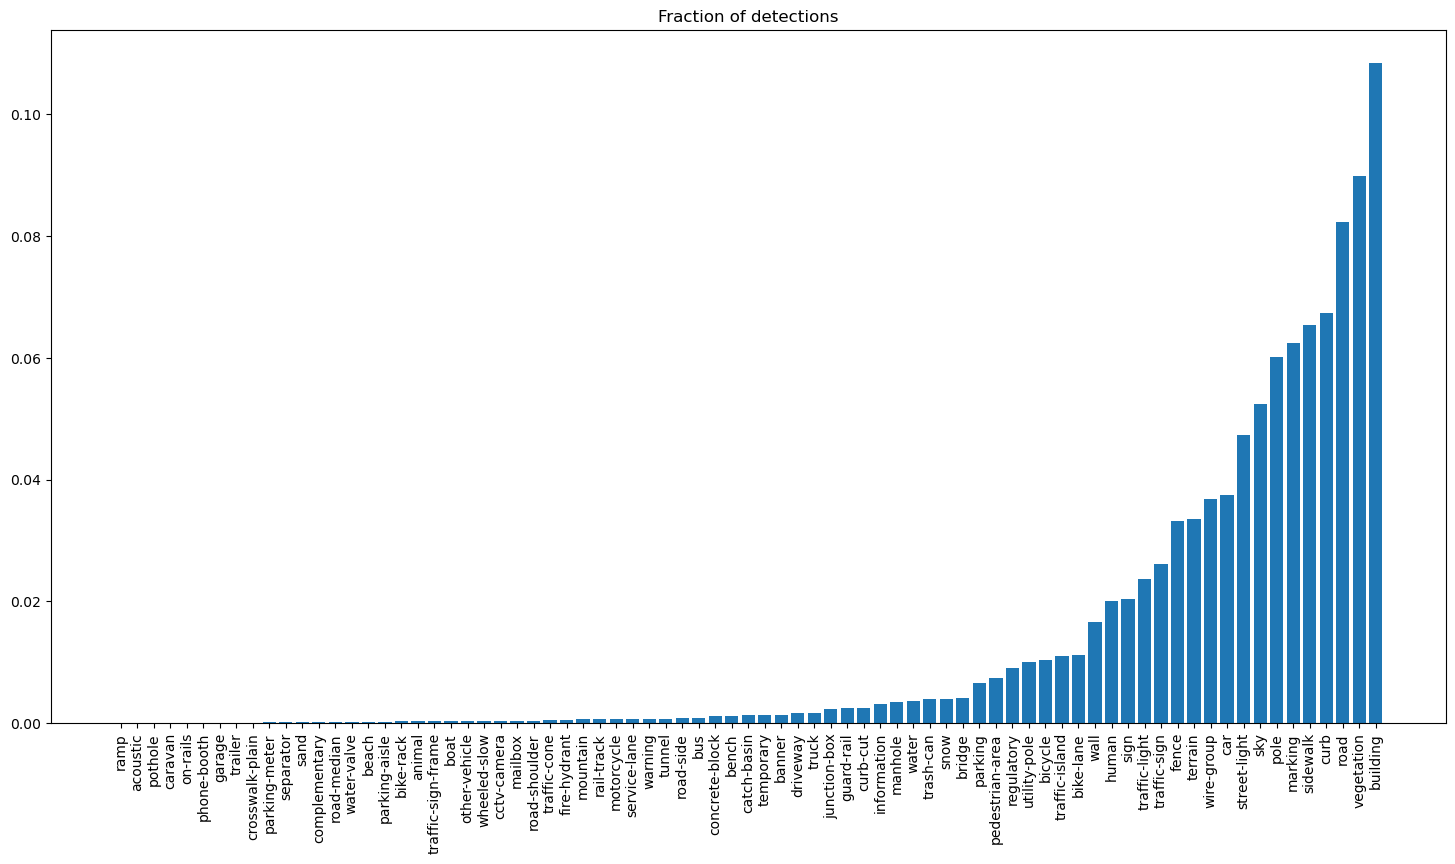

In [13]:
#PlotShapefile(my_shp, bounds)
#PlotAssignedImages(my_shp, bounds, clienttoken, IDs, buffer_size = 0.0001)
#PlotUnassignedPoints(my_shp, clienttoken, bounds, IDs)
PlotFractionImages(classes)
#PlotAvgDetection(dict_image)